# Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research Project

## Covid FastAI Resnet50 Classifier
**Using The SARS-CoV-2 CT-scan dataset for Image Processing and Image Classification Using Convolutional Neural Network**    



The SARS-CoV-2 FastAI  Classifier was created by [Salvatore Raieli](https://github.com/salvatorera) based on his [Resnet50](https://github.com/AMLResearchProject/ALL-FastAI-2019/tree/master/Colab-notebooks/ALL-FastAI-Resnet-50.ipynb) project. The classifier provides a Google Colab notebook that uses FastAI and SARS-CoV-2 from  [A large dataset of CT scans for SARS-CoV-2 (COVID-19) identification](https://www.kaggle.com/plameneduardo/sarscov2-ctscan-dataset). 

## FastAI Classifier Project Contributors

- [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli") - PhD Immunolgy / Bioinformatics, Bologna, Italy

## Disclaimer

This project should be used for research purposes only. The purpose of the project is to show the potential of Artificial Intelligence for medical support systems such as diagnosis systems. 

Although the program is fairly accurate and shows good results both on paper and in real world testing, it is not meant to be an alternative to professional medical diagnosis. 

Salvatore Raieli is a bioinformatician researcher and PhD in Immunology, but does not work in medical diagnosis. 

Please use these systems responsibly.

## Dataset

SARS-CoV-2 CT scan dataset is a public dataset, containing 1252 CT scans (computed tomography scan) that are from positive patients for SARS-CoV-2 infection (COVID-19) and 1230 CT scans for SARS-CoV-2 non-infected patients. This dataset was created by our partners at Lancaster University, PlamenLancaster: Professor Angelov Plamen, and Eduardo Soares.

The dataset has been collected from real patients in Sao Paulo, Brazil. The dataset is available in [Kaggle](www.kaggle.com/plameneduardo/sarscov2-ctscan-dataset). As baseline result for this dataset Lancaster university LIRA group, [LIRA](https://www.lancaster.ac.uk/lira/) used an eXplainable Deep Learning approach (xDNN), you can find the available code on [github](https://www.medrxiv.org/content/10.1101/2020.04.24.20078584v2). 

In using the dataset please cite the original paper by our partners:
Angelov, Plamen, and Eduardo Almeida Soares. "EXPLAINABLE-BY-DESIGN APPROACH FOR COVID-19 CLASSIFICATION VIA CT-SCAN." medRxiv (2020).
Soares, Eduardo, Angelov, Plamen, Biaso, Sarah, Higa Froes, Michele, and Kanda Abe, Daniel. "SARS-CoV-2 CT-scan dataset: A large dataset of real patients CT scans for SARS-CoV-2 identification." medRxiv (2020). doi: https://doi.org/10.1101/2020.04.24.20078584. 

# Installation

Please follow the [Installation Guide](Documentation/Installation.md) to install COVID-19 FastAI Classifiers.

## Import data to Google Drive
You need to download and import **SARS-Cov-2 dataset** from the kaggle page to your Google Drive, 

In this tutorial we assume you have uploaded your copy of the dataset to a folder located on your Google drive with the location: *fastai-v3/Covid-fastAI*. Once you have uploaded the dataset you can continue with this tutorial.

## Google Colab

*You should now be running this tutorial on Google Colab, if not please read this tutorial from the beginning.*

First we need import the Google Colab Drive library, mount our dataset drive from Google Drive, and set the path to the SARS-Cov-2 folder on your drive. Run the following code block to do this. You will be asked to click a link that will authorize the application with the permissions it needs to mount your drive etc. Follow the steps and then past the authorization key into this application.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
dataset_dir = "/content/gdrive/My Drive/fastai-v3/Covid-fastAI/SARS-Cov-2/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Import required libraries and the dataset
## Import required
We need to import the relevant FastAI libraries, running the first code block with do this and get the paths to the dataset files.

## Import datset
We are importing the list of files present in the folders in a list named COVID. We are then extracting the label from the images (using from sklearn.preprocessing the function LabelEncoder). We are then dividing the dataset in the train and test set (we using from sklearn.model_selection  train_test_split). We are using the random_state argument in order to replicate the result. The test_size argument represents the proportion of the dataset to include in the test (in our case the 20%). Since we set the shufflue argument to True, the data will be shufflued before the split. 

Now we need to import the dataset into this notebook. run the following code blocks to import the COVID dataset as a FastAI [DataBunch](https://docs.fast.ai/basic_data.html#DataBunch). In the ImageDataBunch.from_name_list function we can see that we pass the *dataset_dir* we created earlier in the tutorial, fileNames that we created earlier,  pattern for the files, some augmentation, the size of the images we need to replicate original model input sizes.

For more information about getting datasets ready with FastAI you can check out [this article](https://docs.fast.ai/vision.data.html#Quickly-get-your-data-ready-for-training).

## data.show_batch()
Now we use the [data.show_batch()](https://docs.fast.ai/basic_data.html#DataBunch.show_batch) function to show a batch of our data. Run the  code block to do this and view the results.

## View classes info
Now we can run the  code block which will print out the classes list and lengths.



In [2]:
import os
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np
import glob

In [3]:
CTRL_files = glob.glob("/content/gdrive/My Drive/fastai-v3/Covid_fastAI/SARS-Cov-2/non-COVID/*")
COVID_files = glob.glob("/content/gdrive/My Drive/fastai-v3/Covid_fastAI/SARS-Cov-2/COVID/*")
COVID = np.concatenate([CTRL_files, COVID_files])
len(CTRL_files), len(COVID_files), COVID[0]

(1230,
 1252,
 '/content/gdrive/My Drive/fastai-v3/Covid_fastAI/SARS-Cov-2/non-COVID/Non-Covid (211).png')

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

COVID_labels = [fn.split("/")[-1].split(" (")[0] for fn in COVID]
# encode text category labels

le = LabelEncoder()
le.fit(COVID_labels)
COVID_LE = le.transform(COVID_labels)
COVID_LE[0], list(le.classes_)
X_train, X_test, y_train, y_test = train_test_split(COVID, COVID_LE, stratify = COVID_LE, shuffle = True, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(1985, 497)

In [5]:
#Import datset
data = ImageDataBunch.from_lists(dataset_dir, X_train, y_train, ds_tfms=get_transforms(do_flip = True, flip_vert = True), 
                                   size=224, bs=64).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (1588 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,0,1
Path: /content/gdrive/My Drive/fastai-v3/Covid-fastAI/SARS-Cov-2;

Valid: LabelList (397 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,0,0,1,0
Path: /content/gdrive/My Drive/fastai-v3/Covid-fastAI/SARS-Cov-2;

Test: None

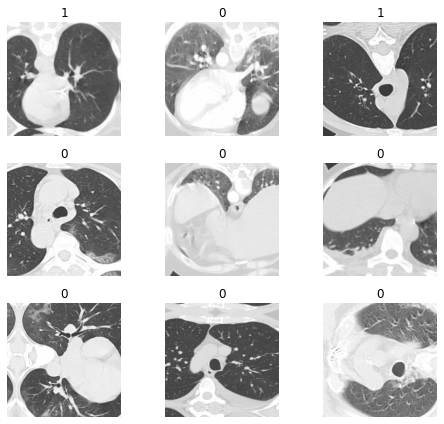

In [6]:
#data.show_batch()
data.show_batch(rows=3, figsize=(7,6))

In [7]:
# View classes info
print(data.classes)
len(data.classes),data.c

[0, 1]


(2, 2)

# The Resnet50 model

## What and why to use transfer learning?

Transfer learning is meaning use a pre-trained model to build our classifier. A pre-trained model is a model that has been previously trained on a dataset. The model comprehends the updated weights and bias.  Using pre-trained model you are saving time and computational resources. Another vantage is that pre-trained models often perform better that architecture designed from scratch. To better understand this point, suppose you want to build a classifier able to sort different sailboat types. A model pre-trained on ships would have already capture in its first layers some boat features, learning faster and with better accuracy among the different sailboat types.

## The Resnet50 architecture

Resnet50 generally is considered a good choice as first architecture to test (as the Resnet34 architechture), it shows good performance without an excessive size allowing to use a higher batch size and thus less computation time. For this reason, before to test more complex architectures Resnet50 is a good compromise.

Residual net have been ideated to solve the problem of the **vanishing gradient**. Highly intricate networks with a large number of hidden layer are working effectively in solving complicated tasks. Their structures allow them to catch pattern in complicated data. When we train the network the early layer tend to be trained slower (the gradient are smaller during backpropagation). The initial layers are important because they learn the basic feature of an object (edge, corner and so on). Failing to proper train these layers lead to a decrease in the overall accuracy of the model.

**Residual neural network** have been ideated to solve this issue. The Resnet model presents the possibility to skip the training of some layer during the initial training. The skipped layer is reusing the learned weights from the previous layer. [Original research article](https://arxiv.org/pdf/1512.03385.pdf)

##Test the Resnet34 architecture with our dataset
Now we are going to test how the FastaAI implementation of this architechture works with the COVID dataset.

Create the convolutional neural network
First we will create the convolutional neural network based on this architechture, to do this we can use the following code block which uses FastAI ( cnn_learner previously create_cnn) function. We pass the loaded data, specify the model, pass error_rate & accuracy as a list for the metrics parameter specifying we want to see both error_rate and accuracy, and finally specify a weight decay of 1e-1 (1.0).

## learn.lr_find() & learn.recorder.plot()
Now we will use the [learn.lr_find()](https://docs.fast.ai/basic_train.html#lr_find) function to run LR Finder. LR Finder help to find the best learning rate to use with our network. For more information the [original paper](https://arxiv.org/pdf/1506.01186.pdf). 
As shown from the output of above,  [learn.recorder.plot()](https://docs.fast.ai/basic_train.html#Recorder.plot) function plot the loss over learning rate. Run the following code block to view the graph. The best learning rate should be chosen as the learning rate value where the curve is the steepest. You may try different learning rate values in order to pick up the best.

## learn.fit_one_cycle() & learn.recorder.plot_losses()
The [learn.fit_one_cycle()](https://docs.fast.ai/basic_train.html#fit_one_cycle) function can be used to fit the model. Fit one cycle reach a comparable accuracy faster than th *fit* function in training of complex models. Fit one cycle instead of maintain fix the learning rate during all the iterations is linearly increasing the learning rate and then it is decreasing again (this process is what is called one cycle). Moreover, this learning rate variation is helping in preventing overfitting. We use 5 for the parameter *cyc_len* to specify the number of cycles to run (on cycle can be considered equivalent to an epoch), and *max_lr* to specify the maximum learning rate to use which we set as *0.001*. Fit one cycle varies the learning rate from 10 fold less the maximum learning rate selected. For more information about fit one cycle: [article](https://arxiv.org/pdf/1803.09820.pdf). We then use [learn.recorder.plot_losses()](https://docs.fast.ai/basic_train.html#Recorder.plot_losses) to plot the losses from *fit_one_cycle* as a graph.

In [8]:
#load the model
learn = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy], wd=1e-1)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


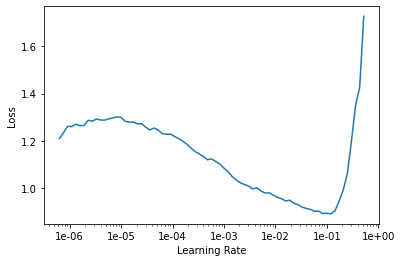

In [9]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.774485,1.209346,0.287154,0.712846,02:02
1,0.532802,0.308435,0.148615,0.851385,00:26
2,0.429824,0.319724,0.105793,0.894207,00:26
3,0.351342,0.151050,0.068010,0.931990,00:26
4,0.288678,0.143632,0.055416,0.944584,00:27


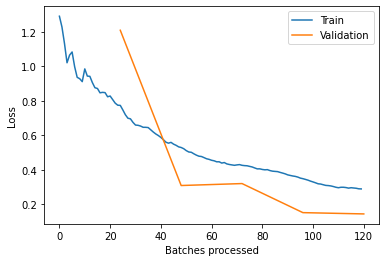

In [10]:
lr = 0.01
learn.fit_one_cycle(cyc_len=5, max_lr=lr)
learn.recorder.plot_losses()

## Save the model
We can save the model once it has been trained. 

## ClassificationInterpretation()
We use  [ClassificationInterpretation()](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation) to visualize interpretations of our model.

## interp.plot_top_losses()
We can use [interp.plot_top_losses()](https://docs.fast.ai/vision.learner.html#plot_top_losses) to view our top losses and their details.

## interp.plot_confusion_matrix()
We will use  [interp.plot_confusion_matrix()](https://docs.fast.ai/vision.learner.html#ClassificationInterpretation.plot_confusion_matrix) to display a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Below, 2 in the top left square represents  true negatives, while  in the top right square represent false positives, in the bottom left square represents false negatives, and in the bottom right represents true positives.

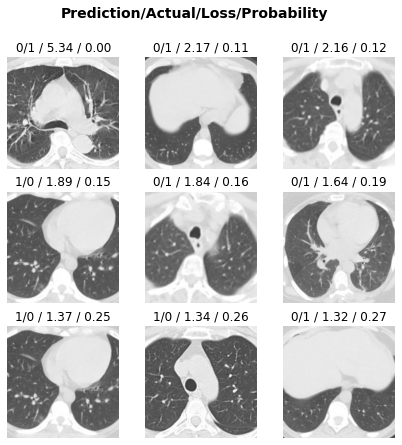

In [11]:
#learn.save('resnet50_covid_model')
preds, y, losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

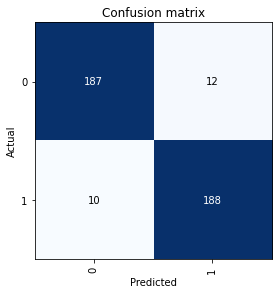

In [12]:
interp.plot_confusion_matrix()

#Unfreeze the model

## learn.unfreeze()
Next we use [learn.unfreeze()](https://docs.fast.ai/basic_train.html#Learner.unfreeze) to unfreeze the model. The original model was trained on ImageNet to classify images among 1000 categories. None of these categories is a leukemia cell, for these reason when fast.ai *cnn_learner* function is behind line substituting the last layer with 2 other layers. The last layer is a matrix that has the same size of our data class (*data.c*). Before, we just trained these two layers while the other model's layers were still keeping the downloaded weight. Unfreezing our model allow us to train also these other layers and updates their weights.

## Train the entire (unfrozen) model
Now that we have unfrozen our model, we will use the following code blocks to train the whole model.

##Slice parameter

Initial layers are activated by simple patterns (like edge, lines, circles etc...)  while the following layers are acquiring the ability to recognize more sophisticated patterns. Update too much the weight of these layers would probably decrease our accuracy. The scope of transfer learning is to exploit this ability of a pre-trained model in recognizing particular patterns and to adapt to our dataset. The parameter *slice* allows to apply ** discriminative learning rate**. In other words, we apply a smaller learning rate (in this case, 1e-5) to the earlier layer and a higher learning rate to the last layer.

## Save the model

We save our model after the un-freezing

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


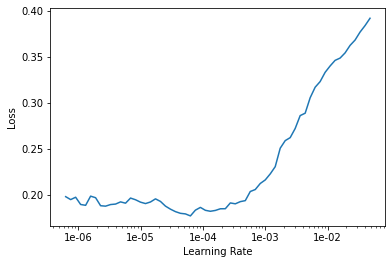

In [13]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [14]:
nlr = slice(1e-5, 1e-4)
learn.fit_one_cycle(5, nlr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.205801,0.137460,0.050378,0.949622,00:28
1,0.197101,0.121720,0.052897,0.947103,00:28
2,0.181999,0.117218,0.042821,0.957179,00:28
3,0.163206,0.102418,0.037783,0.962217,00:28
4,0.150384,0.099949,0.035264,0.964736,00:28


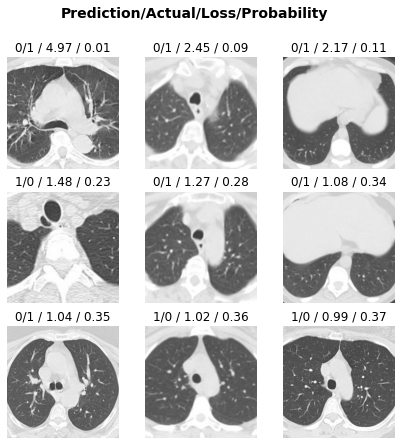

In [15]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_top_losses(9, figsize=(7,7))

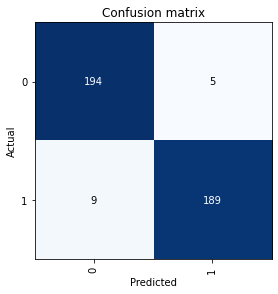

In [16]:
interp.plot_confusion_matrix()

In [17]:
#learn.save('resnet50_covid_unfreeze')

## prediction

In [18]:
#prediction
im= open_image(X_test[0])
_, pred_class, preds = learn.predict(im)
np.argmax(preds)

tensor(1)

# Contributing

The Peter Moss Acute Myeloid & Lymphoblastic Leukemia AI Research project encourages and welcomes code contributions, bug fixes and enhancements from the Github.

Please read the [CONTRIBUTING](https://github.com/AMLResearchProject/ALL-FastAI-2019/blob/master/CONTRIBUTING.md "CONTRIBUTING") document for a full guide to forking our repositories and submitting your pull requests. You will also find information about our code of conduct on this page.

## Contributors

- [Salvatore Raieli](https://github.com/salvatorera "Salvatore Raieli") - [Peter Moss Leukemia AI Research](https://www.leukemiaresearchassociation.ai "Peter Moss Leukemia AI Research") & Biogenera, Bologna, Italy

&nbsp;

# Versioning

We use SemVer for versioning. For the versions available, see [Releases](https://github.com/AMLResearchProject/ALL-FastAI-2019/releases "Releases").

# License

This project is licensed under the **MIT License** - see the [LICENSE](https://github.com/AMLResearchProject/ALL-FastAI-2019/blob/master/LICENSE "LICENSE") file for details.

# Bugs/Issues

We use the [repo issues](https://github.com/AMLResearchProject/ALL-FastAI-2019/issues "repo issues") to track bugs and general requests related to using this project. See [CONTRIBUTING](https://github.com/AMLResearchProject/ALL-FastAI-2019/blob/master/CONTRIBUTING.md "CONTRIBUTING") for more info on how to submit bugs, feature requests and proposals.